# Spatial organization of in-connection density
- Spatial organization of in-connection density in different dimensions.

In [1]:
import numpy as np
import pandas as pd

import datajoint as dj

import matplotlib.pyplot as plt

from lib.utils import *
from lib.data import *
from lib.plot import *

%matplotlib inline

## Load data tables

In [2]:
Neuron = load_dict("data/Neuron.pkl")
Soma = load_dict("data/Soma.pkl")
SynDensity = load_dict("data/SynDensity.pkl")
Stimulus = load_dict("data/Stimulus.pkl")
EASETrace = load_dict("data/EASETrace.pkl")
EASETuning = load_dict("data/EASETuning.pkl")

## All pyramidal cells (PyCs)

In [3]:
pyc_list = Neuron["segment_id"]
n_pyc = pyc_list.shape[0]

## PyC with functional data

In [4]:
pyc_func_list = EASETuning["segment_id"]
n_func = pyc_func_list.shape[0]

osi_p = EASETuning["osi_p"]
dsi_p = EASETuning["dsi_p"]

tune_idx = osi_p<0.01

## Get soma center coordinates

#### All pyramidal cells

In [13]:
pyc_soma_loc = np.zeros((n_pyc, 3))
for i in range(n_pyc):
    
    seg_id = pyc_list[i]
    pyc_soma_loc[i,:] = get_soma_loc(Soma, seg_id)/1000

#### Pyramidal cells with functional data

In [14]:
pyc_func_soma_loc = np.zeros((n_func, 3))
for i in range(n_func):
    
    seg_id = pyc_func_list[i]
    idx = np.where(pyc_list==seg_id)[0][0]
    pyc_func_soma_loc[i,:] = pyc_soma_loc[idx,:]

## Spatial organization of in-connection density

In [7]:
inconn_density = np.zeros((n_func,))
for i in range(n_func):
    
    seg_id = pyc_func_list[i]
    inconn_density[i] = get_density(SynDensity, seg_id, "inconn_dens")

In [16]:
xloc = pyc_func_soma_loc[tune_idx,0]
yloc = pyc_func_soma_loc[tune_idx,1]
zloc = pyc_func_soma_loc[tune_idx,2]

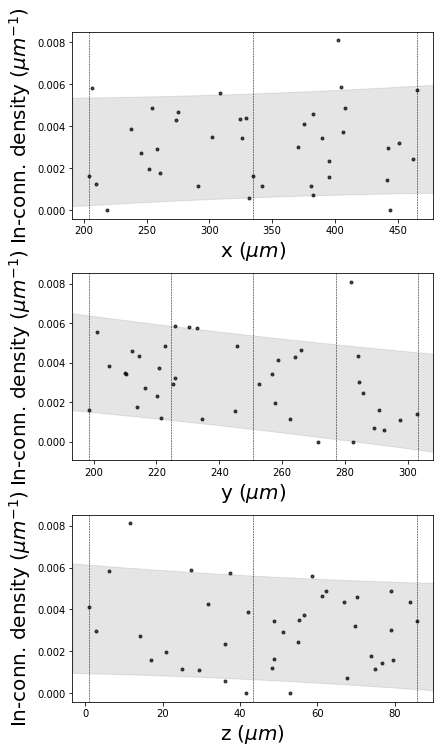

In [17]:
fig = plt.figure(figsize=(6,10), constrained_layout=True)
gs = fig.add_gridspec(3,1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
plot_spatial_ax(ax1, xloc, inconn_density[tune_idx], nbins=3, xlab="x ($\mu m$)")
plot_spatial_ax(ax2, yloc, inconn_density[tune_idx], nbins=5, xlab="y ($\mu m$)")
plot_spatial_ax(ax3, zloc, inconn_density[tune_idx], nbins=3, xlab="z ($\mu m$)")